# Projeto: Busca do menor caminho entre dois nós usando algorítimo de Dijkstra

## Lendo a base de dados

In [70]:
import csv
from typing import List


def read_data(path: str) -> List[List[str]]:
    """
    Lê a base de dados de um arquivo CSV e retorna o conteúdo no formato de lista.

    Args:
        path: Uma string contendo o caminho relativo do arquivo csv.

    Returns:
        Uma lista de listas com as linhas do arquivo no formato string.
    """
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        return [row for row in reader]


data_base = read_data('data_base/lastfm_asia_edges.csv')


## Prepearando o grafo

In [71]:
def build_graph(edges):
    """
    Constrói e retorna um grafo a partir de uma lista de arestas.

    Args:
        edges (list): Uma lista de com 2 itens representando as arestas do grafo.
                      

    Returns:
        dict: Um dicionário de dicionários representando o grafo. 
    
    """
    graph = {}
    for edge in edges:
        source = edge[0]
        dest = edge[1]
        weight = edge[2] if len(edge) == 3 else 1
        
        if source not in graph:
            graph[source] = {}
        if dest not in graph:
            graph[dest] = {}
        
        graph[source][dest] = weight
        graph[dest][source] = weight
    
    return graph

graph = build_graph(data_base)


## Buscando o menor caminho entre dois nós

### Algorítmo de Dijkstra

In [72]:
def dijkstra(graph, start, end):
    """
    Implementa o algoritmo de Dijkstra para encontrar o caminho mais curto entre dois nós de um grafo ponderado.

    Args:
        graph -- dicionário de dicionários representando o grafo ponderado, onde cada chave é um vértice e cada valor é outro dicionário contendo os vizinhos e os pesos das arestas.
        start -- vértice de partida para a busca do caminho mínimo.
        end -- vértice de chegada para a busca do caminho mínimo.

    Returns:
        Um dicionário contendo o caminho mínimo entre os vértices de partida e chegada. Se não houver um caminho válido, o dicionário estará vazio.
    """
    
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0
    visited = set()
    path = {}

    while len(visited) < len(graph):
        current_vertex = None
        current_distance = float('inf')

        for vertex, distance in distances.items():
            if vertex not in visited and distance < current_distance:
                current_vertex = vertex
                current_distance = distance

        visited.add(current_vertex)

        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                path[neighbor] = current_vertex

    path_list = []
    vertex = end
    while vertex != start:
        path_list.append(vertex)
        vertex = path[vertex]
    path_list.append(start)
    path_list.reverse()

    return distances[end], path_list


def print_path_route(start, target, distance, route):
    print(f"Distância mínima de {start} até {target}: {distance}")

    print("Seguindo o caminho:")
    for index in range(len(route)):
        if route[index] != target:
            print(f'-> De {route[index]} para {route[index + 1]}')


#

### Buscando o menor caminho entre dois nós

In [73]:
node_a = '0'
node_b = '1'

distance, route = dijkstra(graph, node_a, node_b)

print_path_route(node_a, node_b, distance, route)


Distância mínima de 0 até 1: 6
Seguindo o caminho:
-> De 0 para 747
-> De 747 para 2020
-> De 2020 para 6463
-> De 6463 para 1698
-> De 1698 para 4257
-> De 4257 para 1


### Ilustrando o menor caminho

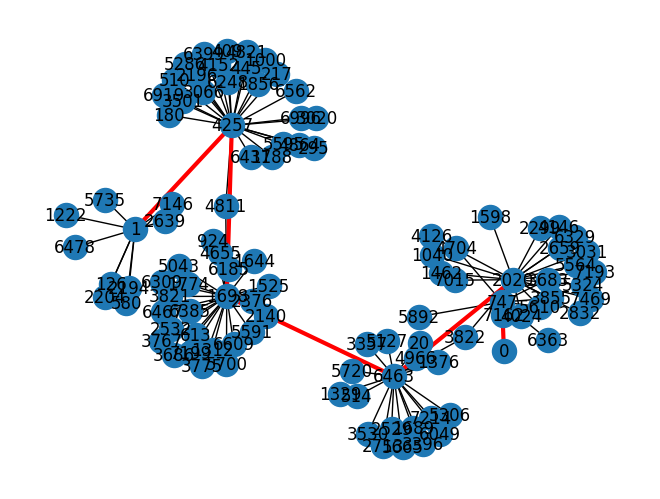

In [74]:
import networkx as nx
import matplotlib.pyplot as plt


def show_route_graph(graph, route):
    G = nx.Graph()

    for node in graph:
        if node in route:
            G.add_node(node)

    for source in graph:
        if source in route:
            for target, weight in graph[source].items():
                G.add_edge(source, target, weight=weight)

    pos = nx.spring_layout(G, k=0.25)
    nx.draw(G, pos, with_labels=True)
    path_edges = list(zip(route, route[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                           edge_color='r', width=3)
    plt.show()

show_route_graph(graph, route)